In [1]:
#import stuff


import os
import numpy as np
import subprocess
from glob import glob

import keras
import utils; reload(utils)
from utils import plots
from utils import save_array,load_array

from shutil import copyfile

# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)
/home/ubuntu/.local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


 ### make validation folder

In [ ]:
#go to folder
%cd /datadrive/kaggle_state_farm_data/train

In [20]:
#create validation data
import subprocess
validation_folder='/datadrive/kaggle_state_farm/valid/'
for d in glob('c?'):
    subprocess.check_output(['sudo','mkdir',validation_folder+d])
    g=glob(d+'/*.jpg')
    shuf=np.random.permutation(g)
    for i in range(200): subprocess.check_output(['sudo','mv',shuf[i],'/home/ubuntu/Notebooks/kaggle_state_farm/valid/'+shuf[i]])#os.rename(shuf[i],'/home/ubuntu/Notebooks/kaggle_state_farm/valid/'+shuf[i])

 ### Definitions

In [9]:
path = "data/dogscats/" #path should have train,test,valid,sample (?) folders, 
#each folder should have classes subfolders
path = "/datadrive/kaggle_state_farm_data/"
path = "/home/ubuntu/Notebooks/Kaggle_Fisherman/"
batch_size=64

In [104]:
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)

/home/ubuntu/.local/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_4 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 3777 images belonging to 8 classes.
Found 449 images belonging to 8 classes.


In [105]:
#train model
vgg.fit(batches, val_batches, nb_epoch=1,verbose=1)

Epoch 1/1
3777/3777 [==============================] - 114s - loss: 2.0232 - acc: 0.4943 - val_loss: 0.8846 - val_acc: 0.6860

In [69]:
#save model
vgg.model.save_weights(path+'results/ft1.h5')

In [106]:
#second epoch
vgg.fit(batches, val_batches, nb_epoch=1,verbose=1)

Epoch 1/1
3777/3777 [==============================] - 112s - loss: 1.3299 - acc: 0.6209 - val_loss: 0.4465 - val_acc: 0.8886

In [107]:
#third epoch
vgg.fit(batches, val_batches, nb_epoch=1,verbose=1)

Epoch 1/1
3777/3777 [==============================] - 115s - loss: 1.0986 - acc: 0.6783 - val_loss: 0.4580 - val_acc: 0.8909

In [13]:
batches = vgg.get_batches(path+'valid', batch_size=4,shuffle=False)

Found 100 images belonging to 2 classes.


In [108]:
#make predictions 

batches,preds = vgg.test(path+'test', batch_size=batch_size*2)


Found 1000 images belonging to 1 classes.


In [109]:
#get filenames
filenames=batches.filenames

In [36]:
import numpy as np
save_array(path+'results/test_preds.dat',preds)
save_array(path+'results/filenames.dat',filenames)

In [41]:
preds=load_array(path+'results/test_preds.dat')


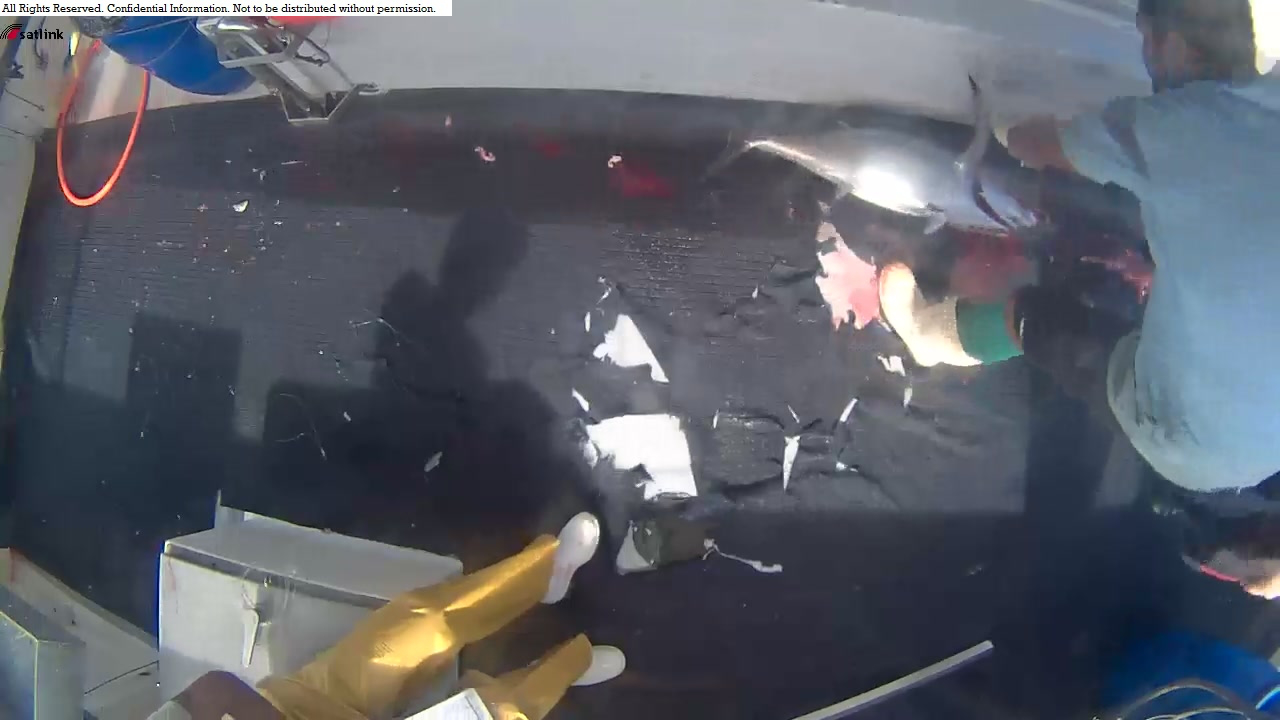

In [28]:
from PIL import Image
Image.open(path+'test/'+filenames[1])

In [48]:
isdog=preds[:,1]
isdog[:5]

array([  1.9596e-12,   1.0000e+00,   1.1237e-10,   1.0000e+00,   1.0000e+00], dtype=float32)

In [50]:
isdog=np.clip(preds[:,1],0.02,0.98)

In [43]:
#fish
preds

array([[  9.6748e-01,   9.8174e-03,   1.0836e-03, ...,   4.8668e-03,   2.1367e-04,   1.1445e-03],
       [  9.0590e-01,   2.7221e-02,   1.0985e-05, ...,   4.9489e-02,   2.1195e-05,   1.5622e-02],
       [  9.7941e-02,   3.3579e-03,   1.3901e-03, ...,   5.7302e-01,   5.3883e-03,   3.1557e-01],
       ..., 
       [  9.7300e-01,   4.7698e-04,   2.0118e-04, ...,   2.2148e-02,   3.6549e-07,   2.7258e-03],
       [  6.2693e-01,   4.1079e-02,   1.7484e-02, ...,   2.8857e-01,   6.6643e-05,   2.3331e-02],
       [  2.6856e-02,   9.6724e-01,   3.9140e-04, ...,   2.9432e-05,   1.6548e-06,   8.9689e-04]], dtype=float32)

In [64]:

#generate ids from file names - dogs cats
ids=[int(f[8:f.find('.')]) for f in filenames]

In [110]:
#generate ids from file names - fisheries
ids=np.array([[(f[8:]) for f in filenames]])

In [111]:
#stack id and prediciotn for submission - cats dogs
subm=np.stack([ids,isdog],axis=1)

NameError: name 'isdog' is not defined

In [112]:
#stack id and prediciotn for submission - fisheries
subm=np.concatenate((ids.T,preds),axis=1)

In [1]:
#save submssion file
np.savetxt(path+'submissions/subm_27_1_17.csv',subm,fmt=':.2%',header='image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT')

NameError: name 'np' is not defined

In [113]:
sub_file_name='submissions/subm.csv'

In [101]:
import pandas as pd
pd.DataFrame(subm).to_csv(path+sub_file_name,index=False,header=['image','ALB','BET','DOL','LAG','NoF','OTHER','SHARK','YFT'])

In [102]:
#python pacakge to generate downlad link
from IPython.display import FileLink
FileLink(path+sub_file_name)

/home/ubuntu/Notebooks/Kaggle_Fisherman/submissions/subm.csv